# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


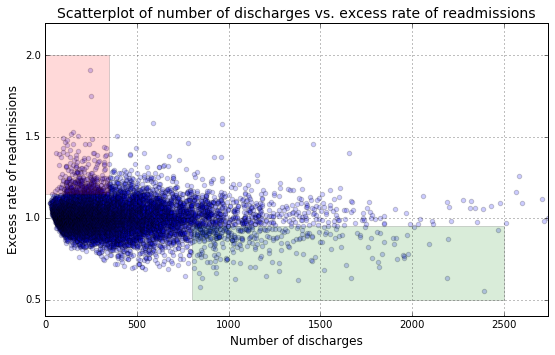

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Analysis Review
#### Conclusions
- There isn't enough proof to conclude that there is a significant between number of discharges and readmission rates. From the plot itself I could barely tell the correlation. In order to determine if there's a significant correlation or not, it would be helpful to use a metric like pearson r.
- It's impossible to conclude that small hospitals necessarily lack the resources to provide adequate care, and that this leads to high readmission rates. There are many variables possibly affecting the correlation. For example, a hospital's specialty could affect the discharge ratio because some sicknesses can naturally lead to higher readmission rates. A hospital's location can also have a big effect because some local populations tend to be healthier than others.

#### Recommendations
- "Quality care" is a vague term and using just one metric (readmission rate) isn't helpful in defining the problem. 
- Larger hospitals don't necessarily mean higher quality of care. Again, other factors may be in play especially if we're only looking at one metric.

### 1. Hypothesis Test
$H_{0}$: Readmission rate is independent from hospital capacity/number of discharges

$H_{a}$: Readmission rate is significantly correlated with hospital capacity/number of discharges

In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


For the purpose of this exercise, I will simply ignore missing readmission ratio data. Normally this is bad practice, but because only 81/11578 (0.7%) is missing, it would make the analysis easier. Also for a broad hypothesis, super precise data isn't a high priority. 

In [6]:
clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


### 2. Calculating p-value

In [7]:
from scipy.stats import pearsonr

discharges = clean_hospital_read_df['Number of Discharges']
readmissions = clean_hospital_read_df['Excess Readmission Ratio']
r, p_value = pearsonr(discharges, readmissions)
print("r: {} p-value: {} ".format(r, p_value))


r: -0.09739794351079353 p-value: 1.222547377680967e-25 


### 3. Statistical significance for $\alpha$ = 0.01
Our calculated p-value of $1.22\times 10^{-25}$ is significantly smaller than $\alpha$ = $0.01$. Therefore we can confidently reject the null hypothesis and conclude that our results are statistically significant

### 4. Practical vs. Statistical significance
Our analysis definitively showed statistical significance, but that does not necessarily mean our results are practically significant. Practical significance refers to the effect that outside factors have on the feature we're trying to observe. In this case, we're observing the feature of readmission rates which can depend also on hospital location, the surrounding population, the type of care they offer, among many other possible features. Because of these real-world variables that aren't controlled in this experiment, we can't conclude that our results are practically significant. 

### 5. Plotting readmission rate vs. discharges
The plot above has the following pros and cons.

**pros**:

- The relationship can be seen just by the points (if you squint)
- It displays regions of interest

**cons**:

- The significance of the relationship between variables isn't quantified
- The regions of interest aren't labeled

Below is a different and more direct plot that conveys the same information.

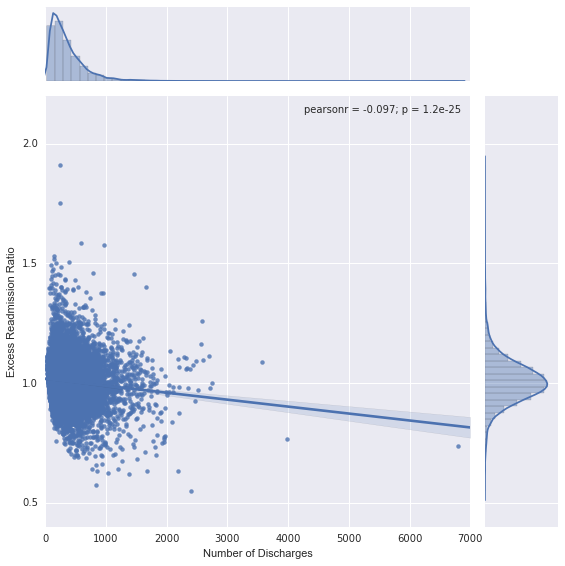

In [14]:
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
ax = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, xlim = (0,7000), 
                   kind='reg', size=8)
plt.show()

The jointplot allows us to see the correlation between number of discharges and readmission ratio (in this case r = -0.097). The low r value tells us that this relationship isn't all that significant. We can also now see where most x and y values lie.  The readmission ratio follows a normal distribution with mean centered at ~1.0, with a skinny tail at y > 1.4. These anomalies from small hospitals may be the cause for much of the correlation between x and y. 